In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [5]:
# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels
kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (degree=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

In [7]:
for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

    print(f"\n===== {name} Kernel =====")
    print(classification_report(y_test, y_pred))


===== Linear Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


===== Polynomial (degree=3) Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


===== RBF Kernel =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00   

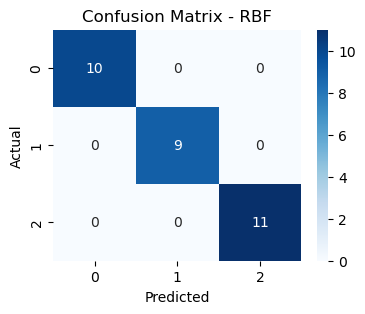

{'Linear': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0},
 'Polynomial (degree=3)': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0},
 'RBF': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}}

In [11]:
 # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print summary results
results

In [13]:
print("\n=== Best Kernel Based on Accuracy ===")
best = max(results, key=lambda x: results[x]["Accuracy"])
print(best, "performed the best with accuracy =", results[best]["Accuracy"])



=== Best Kernel Based on Accuracy ===
Linear performed the best with accuracy = 1.0


In [15]:
#2
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Model WITHOUT Scaling -----------
model_no_scale = SVC(kernel='rbf')
model_no_scale.fit(X_train, y_train)

train_no_scale = model_no_scale.score(X_train, y_train)
test_no_scale = model_no_scale.score(X_test, y_test)

# ----------- Model WITH Scaling -----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)

train_scaled = model_scaled.score(X_train_scaled, y_train)
test_scaled = model_scaled.score(X_test_scaled, y_test)

In [19]:
print("\n===== Training Accuracy =====")
print("Without Scaling:", train_no_scale)
print("With Scaling:", train_scaled)

print("\n===== Testing Accuracy =====")
print("Without Scaling:", test_no_scale)
print("With Scaling:", test_scaled)


===== Training Accuracy =====
Without Scaling: 0.9142857142857143
With Scaling: 0.989010989010989

===== Testing Accuracy =====
Without Scaling: 0.9473684210526315
With Scaling: 0.9824561403508771
